In [ ]:
pip install transformers

In [ ]:
from PIL import Image
from transformers import AutoProcessor, TFCLIPVisionModel
import tensorflow as tf
import numpy as np
import json
import cv2
from sklearn.metrics.pairwise import cosine_similarity

import requests
import warnings
warnings.filterwarnings('ignore')

model = TFCLIPVisionModel.from_pretrained("openai/clip-vit-base-patch32")
processor = AutoProcessor.from_pretrained("openai/clip-vit-base-patch32")

directory_path = '/content/'

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/606M [00:00<?, ?B/s]

Some layers from the model checkpoint at openai/clip-vit-base-patch32 were not used when initializing TFCLIPVisionModel: ['clip/text_model/encoder/layers_._11/layer_norm2/beta:0', 'clip/text_model/encoder/layers_._7/mlp/fc1/bias:0', 'clip/text_model/encoder/layers_._8/self_attn/k_proj/kernel:0', 'clip/text_model/encoder/layers_._11/mlp/fc2/bias:0', 'clip/text_model/encoder/layers_._3/layer_norm2/gamma:0', 'clip/text_model/encoder/layers_._1/layer_norm1/gamma:0', 'clip/text_model/encoder/layers_._5/layer_norm2/beta:0', 'clip/text_model/encoder/layers_._8/self_attn/v_proj/kernel:0', 'clip/text_model/encoder/layers_._5/mlp/fc1/bias:0', 'clip/text_model/encoder/layers_._11/self_attn/out_proj/kernel:0', 'clip/text_model/encoder/layers_._11/self_attn/v_proj/bias:0', 'clip/text_model/encoder/layers_._0/self_attn/out_proj/bias:0', 'clip/text_model/encoder/layers_._2/layer_norm1/gamma:0', 'clip/text_model/embeddings/position_embedding/embeddings:0', 'clip/text_model/encoder/layers_._4/layer_nor

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
#  check number of frames
def get_frame_nr(video_path):
    cap=cv2.VideoCapture(video_path)
    frames = 1
    while(cap.isOpened()):
        ret,_=cap.read()
        if ret==True:
            frames+=1
        else:
            break
    return frames


In [ ]:
import os
import datetime
directory_path = '/content/drive/MyDrive/MSS PROJECT/DATASET OEP/'
all_files = os.listdir(directory_path)
video_files = [file for file in all_files if file.startswith('test') and file.endswith('.avi')]
video_files.sort()

for video_file in video_files:
    video_path = os.path.join(directory_path, video_file)
    print(video_file)
    print(video_path)

#  Check all the detailes about video
for video_file in video_files:
    video_path = os.path.join(directory_path, video_file)
    print(video_path)
    # f_nr=get_frame_nr(video_path)
    # print("frame_nr -" ,f_nr)
    video = cv2.VideoCapture(video_path)
    fps = video.get(cv2.CAP_PROP_FPS)
    frame_count = video.get(cv2.CAP_PROP_FRAME_COUNT)
    seconds = frame_count // fps
    video_time = datetime.timedelta(seconds=seconds)

    print("FPS -", fps)
    print("Frame count- ", frame_count)
    print("Second - ", seconds)
    print("video_time- ",video_time)
    # print("f_nr fps -", f_nr//seconds)
    # if(f_nr == frame_count): print("true")
    # else: print("false")




In [ ]:
directory_path_features = '/content/drive/MyDrive/MSS PROJECT/DATASET_OEP_FEATURES/'

i=1
for video_file in video_files:

    video_path = os.path.join(directory_path, video_file)
    print(video_path, '   START')
    cap = cv2.VideoCapture(video_path)
    fps = int( cap.get(cv2.CAP_PROP_FPS) )
    fps=int(fps*2)
    print(fps)
    # Initialize an empty list to store CLIP vision vectors
    clip_vision_vectors = []
    count = 0
    # Read frames from the video and process them
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        count +=1
        if(count % fps != 0): continue
        # Convert the frame to the required format (resize, normalize, etc.)
        frame = cv2.resize(frame, (224, 224))  # Resize to CLIP model input size
        frame = frame / 255.0  # Normalize pixel values to [0, 1]
        # Ensure the data type is uint8
        frame = (frame * 255).astype(np.uint8)
        # Convert the frame to a PIL Image
        frame_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        # print(frame_image)
        # frame_image.show()
        # Extract features using the feature extractor
        inputs = processor(images=frame_image, return_tensors="tf")
        outputs = model(**inputs)
        pooled_output = outputs.pooler_output.numpy()
        # print(pooled_output.shape)
        # Append the vision features to the list
        clip_vision_vectors.append(pooled_output)
        # print(count)
    # Release the video capture object
    cap.release()

    # Concatenate the vision vectors to a single tensor
    clip_vision_vectors = tf.stack(clip_vision_vectors, axis=0)

    # The clip_vision_vectors now contains the CLIP vision vectors for each frame
    print("Shape of CLIP vision vectors:", clip_vision_vectors.shape)
    # type(clip_vision_vectors)
    print(video_path,'   DONE')
    # Save CLIP vision vectors into numpy array

    file_path = directory_path_features+video_file.split('.')[0]+'.npy'
    i+=1
    np.save(file_path, clip_vision_vectors)
    print(file_path,'   SAVED')





/content/drive/MyDrive/MSS PROJECT/DATASET OEP/test1.avi    START
50
Shape of CLIP vision vectors: (530, 1, 768)
/content/drive/MyDrive/MSS PROJECT/DATASET OEP/test1.avi    DONE
/content/drive/MyDrive/MSS PROJECT/DATASET_OEP_FEATURES/test1.npy    SAVED
/content/drive/MyDrive/MSS PROJECT/DATASET OEP/test10.avi    START
50
Shape of CLIP vision vectors: (413, 1, 768)
/content/drive/MyDrive/MSS PROJECT/DATASET OEP/test10.avi    DONE
/content/drive/MyDrive/MSS PROJECT/DATASET_OEP_FEATURES/test10.npy    SAVED
/content/drive/MyDrive/MSS PROJECT/DATASET OEP/test11.avi    START
50
Shape of CLIP vision vectors: (456, 1, 768)
/content/drive/MyDrive/MSS PROJECT/DATASET OEP/test11.avi    DONE
/content/drive/MyDrive/MSS PROJECT/DATASET_OEP_FEATURES/test11.npy    SAVED
/content/drive/MyDrive/MSS PROJECT/DATASET OEP/test12.avi    START
50
Shape of CLIP vision vectors: (464, 1, 768)
/content/drive/MyDrive/MSS PROJECT/DATASET OEP/test12.avi    DONE
/content/drive/MyDrive/MSS PROJECT/DATASET_OEP_FEATURES

In [ ]:
import datetime
fps=9
cosine_array = []
threshold = 0.92
output_array = []
count=0
file_path = '/content/soumya.npy'
event_no = 0
cosine_output = []
clip_vision_vectors = np.load(file_path)
main_frame = clip_vision_vectors[0]
main_output = tf.reshape(main_frame, (1, -1))  # Reshape output1
for i in range(1,len(clip_vision_vectors) ):

    count += 1
    curr_frame = clip_vision_vectors[i]
    curr_output = tf.reshape(curr_frame, (1, -1))  # Reshape output2

    # Calculate the cosine similarity between the two vectors
    similarity = cosine_similarity(main_output, curr_output)
    # print("Cosine Similarity:", similarity[0][0])
    cosine_output.append(similarity[0][0])

    if(similarity < threshold ):
        output_array.append(i)
        main_frame = curr_frame
        main_output = curr_output
        event_no+=1
        timestamp = i // fps
        timestamp = datetime.timedelta(seconds=timestamp)
        print(i ,"  ", timestamp)
        # print(similarity)

print(event_no)


7    0:00:00
30    0:00:03
128    0:00:14
129    0:00:14
256    0:00:28
257    0:00:28
281    0:00:31
282    0:00:31
284    0:00:31
286    0:00:31
292    0:00:32
308    0:00:34
313    0:00:34
344    0:00:38
370    0:00:41
372    0:00:41
375    0:00:41
384    0:00:42
385    0:00:42
408    0:00:45
433    0:00:48
435    0:00:48
440    0:00:48
453    0:00:50
456    0:00:50
458    0:00:50
478    0:00:53
486    0:00:54
512    0:00:56
513    0:00:57
625    0:01:09
640    0:01:11
645    0:01:11
683    0:01:15
714    0:01:19
725    0:01:20
728    0:01:20
747    0:01:23
768    0:01:25
769    0:01:25
775    0:01:26
849    0:01:34
851    0:01:34
860    0:01:35
864    0:01:36
896    0:01:39
901    0:01:40
985    0:01:49
990    0:01:50
995    0:01:50
1012    0:01:52
1024    0:01:53
1026    0:01:54
1061    0:01:57
1065    0:01:58
1068    0:01:58
1072    0:01:59
1074    0:01:59
1075    0:01:59
1076    0:01:59
1082    0:02:00
1087    0:02:00
1114    0:02:03
1119    0:02:04
1122    0:02:04
1129    0:02:

(460, 1, 768)


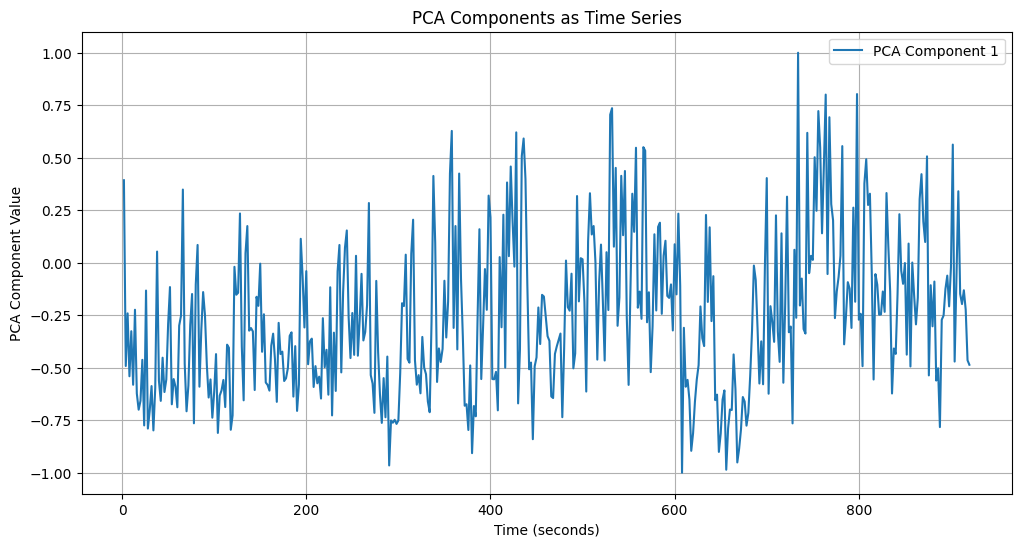

In [ ]:
# Soumya
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/MSS PROJECT/DATASET_OEP_FEATURES/test22.npy'
data= np.load(file_path)
print(data.shape)
x=data.shape[0]
y=data.shape[2]

# Reshape the data to (1000, 768) as PCA expects 2D data
data_2d = data.reshape(x, y)

# Apply PCA to reduce the dimensionality
n_components = 1  # Number of components for visualization
pca = PCA(n_components=n_components)
data_reduced = pca.fit_transform(data_2d)

# Calculate time in seconds for each frame
frame_rate = 0.5  # Frames per second
time_in_seconds = np.arange(1, x+1) / frame_rate

# Min-Max scaling to normalize the PCA components to -1 to 1 range
min_val = np.min(data_reduced, axis=0)
max_val = np.max(data_reduced, axis=0)
data_normalized = -1 + 2 * (data_reduced - min_val) / (max_val - min_val)

# Plot PCA components as a time series
plt.figure(figsize=(12, 6))
for component in range(n_components):
    plt.plot(time_in_seconds, data_normalized[:, component], label=f'PCA Component {component + 1}')

plt.title('PCA Components as Time Series')
plt.xlabel('Time (seconds)')
plt.ylabel('PCA Component Value')
plt.legend()
plt.grid()
plt.show()

(1726, 1, 768)


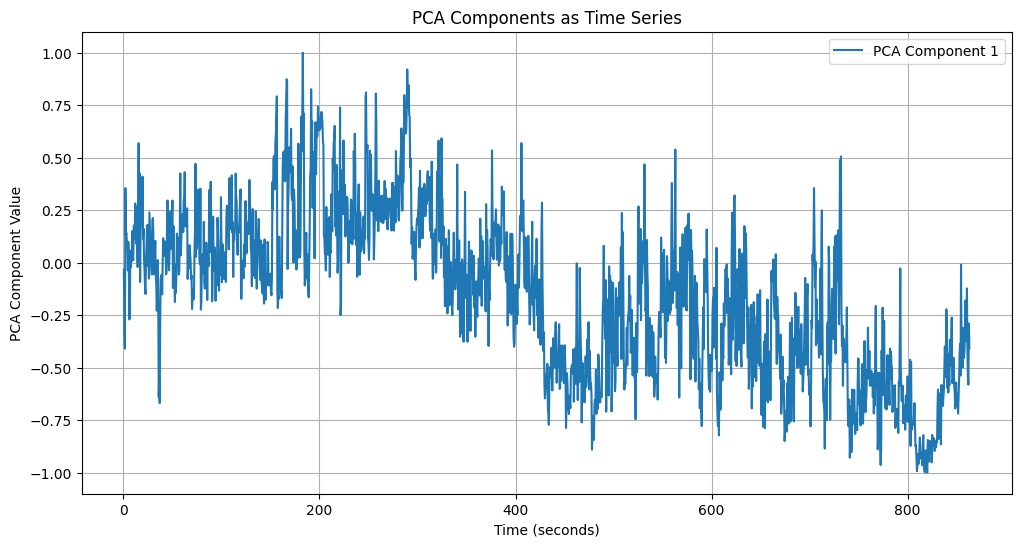

In [ ]:
# Karan

file_path = '/content/karan.npy'
data= np.load(file_path)
print(data.shape)
x=data.shape[0]
y=data.shape[2]

# Reshape the data to (1000, 768) as PCA expects 2D data
data_2d = data.reshape(x, y)

# Apply PCA to reduce the dimensionality
n_components = 1  # Number of components for visualization
pca = PCA(n_components=n_components)
data_reduced = pca.fit_transform(data_2d)

# Calculate time in seconds for each frame
frame_rate = 2  # Frames per second
time_in_seconds = np.arange(1, x+1) / frame_rate

# Min-Max scaling to normalize the PCA components to -1 to 1 range
min_val = np.min(data_reduced, axis=0)
max_val = np.max(data_reduced, axis=0)
data_normalized = -1 + 2 * (data_reduced - min_val) / (max_val - min_val)

# Plot PCA components as a time series
plt.figure(figsize=(12, 6))
for component in range(n_components):
    plt.plot(time_in_seconds, data_normalized[:, component], label=f'PCA Component {component + 1}')

plt.title('PCA Components as Time Series')
plt.xlabel('Time (seconds)')
plt.ylabel('PCA Component Value')
plt.legend()
plt.grid()
plt.show()

(404, 1, 768)


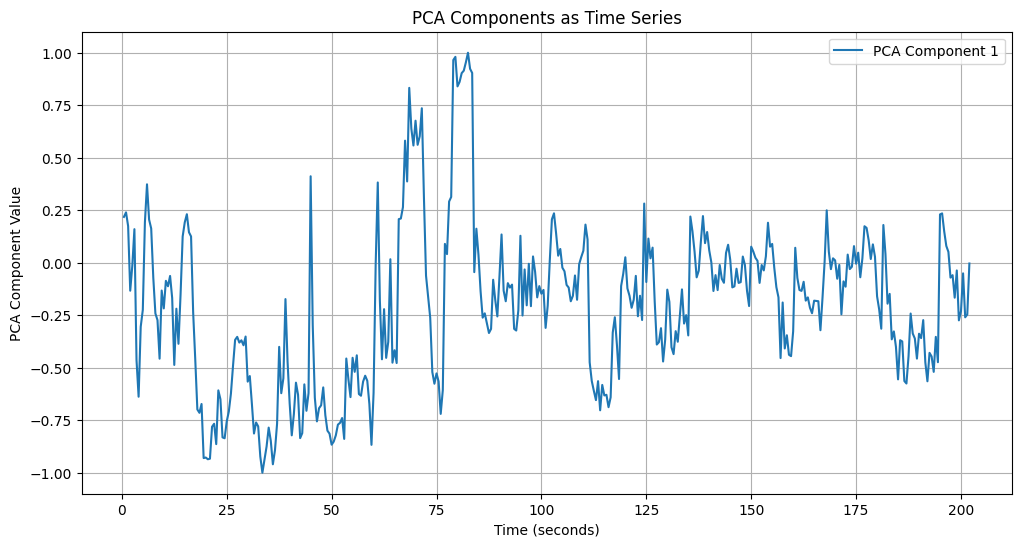

In [ ]:
# Sushant

file_path = '/content/sushant.npy'
data= np.load(file_path)
print(data.shape)
x=data.shape[0]
y=data.shape[2]

# Reshape the data to (1000, 768) as PCA expects 2D data
data_2d = data.reshape(x, y)

# Apply PCA to reduce the dimensionality
n_components = 1  # Number of components for visualization
pca = PCA(n_components=n_components)
data_reduced = pca.fit_transform(data_2d)

# Calculate time in seconds for each frame
frame_rate = 2  # Frames per second
time_in_seconds = np.arange(1, x+1) / frame_rate

# Min-Max scaling to normalize the PCA components to -1 to 1 range
min_val = np.min(data_reduced, axis=0)
max_val = np.max(data_reduced, axis=0)
data_normalized = -1 + 2 * (data_reduced - min_val) / (max_val - min_val)

# Plot PCA components as a time series
plt.figure(figsize=(12, 6))
for component in range(n_components):
    plt.plot(time_in_seconds, data_normalized[:, component], label=f'PCA Component {component + 1}')

plt.title('PCA Components as Time Series')
plt.xlabel('Time (seconds)')
plt.ylabel('PCA Component Value')
plt.legend()
plt.grid()
plt.show()

(633, 1, 768)


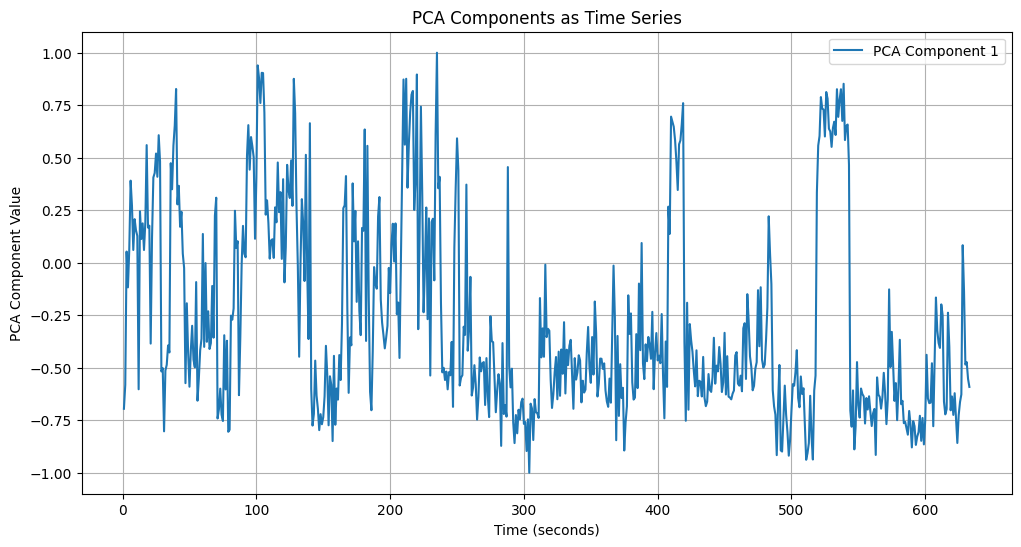

In [ ]:
#  Saksham

file_path = '/content/saksham.npy'
data= np.load(file_path)
print(data.shape)
x=data.shape[0]
y=data.shape[2]

# Reshape the data to (1000, 768) as PCA expects 2D data
data_2d = data.reshape(x, y)

# Apply PCA to reduce the dimensionality
n_components = 1  # Number of components for visualization
pca = PCA(n_components=n_components)
data_reduced = pca.fit_transform(data_2d)

# Calculate time in seconds for each frame
frame_rate = 1  # Frames per second
time_in_seconds = np.arange(1, x+1) / frame_rate

# Min-Max scaling to normalize the PCA components to -1 to 1 range
min_val = np.min(data_reduced, axis=0)
max_val = np.max(data_reduced, axis=0)
data_normalized = -1 + 2 * (data_reduced - min_val) / (max_val - min_val)

# Plot PCA components as a time series
plt.figure(figsize=(12, 6))
for component in range(n_components):
    plt.plot(time_in_seconds, data_normalized[:, component], label=f'PCA Component {component + 1}')

plt.title('PCA Components as Time Series')
plt.xlabel('Time (seconds)')
plt.ylabel('PCA Component Value')
plt.legend()
plt.grid()
plt.show()